Tutorial to demonstrate running parameter estimation on GW150914 using open data.

This example estimates the non-spinning parameters of the binary black hole system using
commonly used prior distributions.  This will take about 30 minutes to run.

More at https://lscsoft.docs.ligo.org/bilby/examples.html

In [1]:
from __future__ import division, print_function
import bilby

23:15 bilby INFO    : Running bilby version: 0.4.0:


In [2]:
outdir = 'outdir'
label = 'GW150914'
time_of_event = bilby.gw.utils.get_event_time(label)

This sets up logging output to understand what bilby is doing

In [3]:
bilby.core.utils.setup_logger(outdir=outdir, label=label)

Here we import the detector data. This step downloads data from the
LIGO/Virgo open data archives. The data is saved to an `Interferometer`
object (here called `H1` and `L1`). A Power Spectral Density (PSD) estimate
is also generated and saved to the same object. To check the data and PSD
makes sense, for each detector a plot is created in the `outdir` called
H1_frequency_domain_data.png and LI_frequency_domain_data.png. The two
objects are then placed into a list.
For GW170817, 170608 and 170814 add the following line to select clean data:
```python
kwargs = {"tag": 'CLN'}
```

23:15 bilby WARNING : Parameter estimation for real interferometer data in bilby is in alpha testing at the moment: the routines for windowing and filtering have not been reviewed.
23:15 bilby INFO    : Using cached data from outdir/H1_1126259460.4_1126259464.4.txt
23:15 bilby INFO    : Low pass filter frequency of 2048.0Hz requested, this is equal or greater than the Nyquist frequency so no filter applied
23:15 bilby INFO    : Using cached data from outdir/H1_1126258440.4_1126258540.4.txt
23:15 bilby INFO    : Low pass filter frequency of 2048.0Hz requested, this is equal or greater than the Nyquist frequency so no filter applied
23:15 bilby INFO    : Creating PSD with non-overlapping tukey window, alpha=0.1, roll off=0.2
23:15 bilby INFO    : Generating frequency domain strain from given time domain strain.
23:15 bilby INFO    : Applying a tukey window with alpha=0.1, roll off=0.2
/Users/vivien/miniconda3/envs/odw2019/lib/python2.7/site-packages/matplotlib/cbook/deprecation.py:107: M

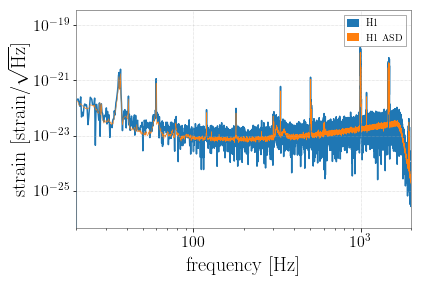

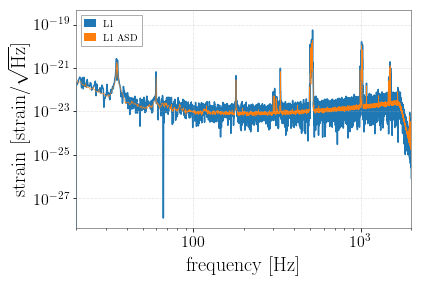

In [4]:
interferometers = bilby.gw.detector.get_event_data(label)

We now define the prior. We have defined our prior distribution in a file packaged with BILBY. The prior is printed to the terminal at run-time.

In [5]:
prior = bilby.gw.prior.BBHPriorDict(filename='GW150914.prior')

You can overwrite this using the syntax below in the file, or choose a fixed value by just providing a float value as the prior. To speed-up the analysis, let's run with a simpler, non-spinning model:

In [6]:
prior['a_1']=0.0
prior['a_2']=0.0
prior['tilt_1']=0.0
prior['tilt_2']=0.0
prior['phi_12']=0.0
prior['phi_jl']=0.0

In this step we define a `waveform_generator`. This is out object which
creates the frequency-domain strain. In this instance, we are using the
`lal_binary_black_hole model` source model. We also pass other parameters:
the waveform approximant and reference frequency.

In [7]:
waveform_generator = bilby.gw.WaveformGenerator(
    frequency_domain_source_model=bilby.gw.source.lal_binary_black_hole,
    waveform_arguments={'waveform_approximant': 'IMRPhenomPv2',
                        'reference_frequency': 50})

In this step, we define the likelihood. Here we use the standard likelihood
function, passing it the data and the waveform generator.

In [8]:
likelihood = bilby.gw.likelihood.GravitationalWaveTransient(
    interferometers, waveform_generator, phase_marginalization=True, priors=prior)


23:15 bilby WARNING : The waveform_generator start_time is not equal to that of the provided interferometers. Overwriting the waveform_generator.


Finally, we run the sampler. This function takes the likelihood and prior
along with some options for how to do the sampling and how to save the data

In [9]:
result = bilby.run_sampler(likelihood, prior, sampler='dynesty',
                           outdir=outdir, label=label)

23:15 bilby INFO    : Running for label 'GW150914', output will be saved to 'outdir'
23:15 bilby INFO    : Search parameters:
23:15 bilby INFO    :   luminosity_distance = UniformComovingVolume(minimum=100.0, maximum=1000.0, cosmology=FlatLambdaCDM(name="Planck15", H0=67.7 km / (Mpc s), Om0=0.307, Tcmb0=2.725 K, Neff=3.05, m_nu=[0.   0.   0.06] eV, Ob0=0.0486), name='luminosity_distance', latex_label='$d_L$', unit=Unit("Mpc"))
23:15 bilby INFO    :   dec = Cosine(name='dec', latex_label='$\\mathrm{DEC}$', unit=None, minimum=-1.5707963267948966, maximum=1.5707963267948966)
23:15 bilby INFO    :   geocent_time = Uniform(minimum=1126259462.322, maximum=1126259462.522, name='geocent_time', latex_label='$t_c$', unit='$s$')
23:15 bilby INFO    :   psi = Uniform(minimum=0, maximum=3.141592653589793, name='psi', latex_label='$\\psi$', unit=None)
23:15 bilby INFO    :   ra = Uniform(minimum=0, maximum=6.283185307179586, name='ra', latex_label='$\\mathrm{RA}$', unit=None)
23:15 bilby INFO    :  

23:41 bilby INFO    : Sampling time: 0:25:50.255415
23:41 bilby ERROR   : 

 Saving the data has failed with the following message:
 'NoneType' object has no attribute 'exceptions' 


23:41 bilby INFO    : Results saved to outdir/
23:41 bilby INFO    : Summary of results:
nsamples: 12425
log_noise_evidence: -17240.242
log_evidence: -16953.991 +/-  0.156
log_bayes_factor: 286.250 +/-  0.156



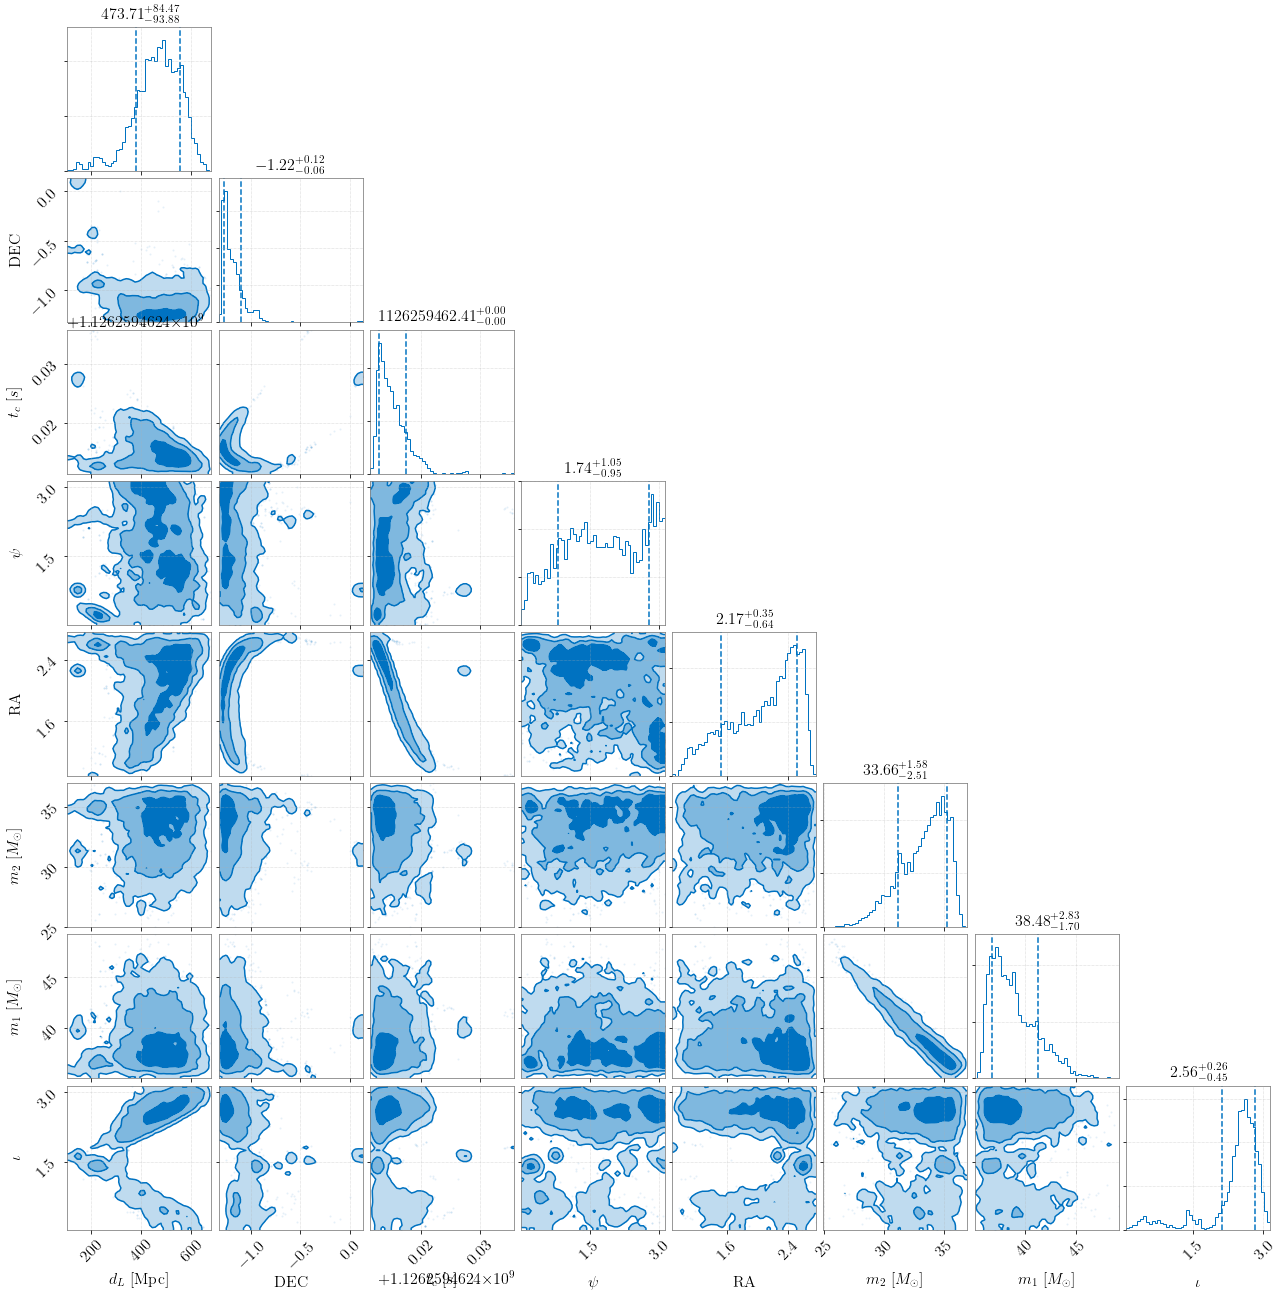

In [10]:
result.plot_corner()